# LSTM-RNN Network

In [87]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

In [88]:
dataTrain=pd.read_csv("DATA_train.csv")
dataTrain=pd.DataFrame(dataTrain)
print(dataTrain.head(5))

         Date   Price    Open    High     Low  Change
0  1985-03-25  0.6877  0.6877  0.6877  0.6877   -0.54
1  1985-03-26  0.6938  0.6938  0.6938  0.6938    0.89
2  1985-03-27  0.7077  0.7077  0.7077  0.7077    2.00
3  1985-03-28  0.7124  0.7124  0.7124  0.7124    0.66
4  1985-03-29  0.7209  0.7209  0.7209  0.7209    1.19


In [89]:
# Préparer les séquences d'entrée (X_Train) et les valeurs à prédire (y_Train)
X_Train = []
y_Train = []
observation_size = 10

for i in range(len(dataTrain) - observation_size):
    # Prendre deux observations consécutives
    X_Train.append(dataTrain.iloc[i:i + observation_size, 1:])  # Colonnes [Price, Open, High, Low, Change]

    # Prédire 'Open' et 'Close' du troisième pas de temps
    y_Train.append(dataTrain.iloc[i + observation_size, [2, 1]])  # Open = colonne 2, Close = colonne 1

X_Train = np.array(X_Train)
y_Train = np.array(y_Train)

X_Train = X_Train.astype("float32")
y_Train = y_Train.astype("float32")

# Vérifiez les dimensions
print("Shape de X_Train :", X_Train.shape)  # (nombre_exemples, 10, 5)
print("Shape de y_Train :", y_Train.shape)  # (nombre_exemples, 2)

Shape de X_Train : (9768, 10, 5)
Shape de y_Train : (9768, 2)


In [90]:
model = keras.Sequential([
    keras.layers.Input(shape=(10, 5)),
    keras.layers.LSTM(50, activation='relu', return_sequences=True),
    keras.layers.LSTM(50, activation='relu', return_sequences=False),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='linear')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='huber')

# Entraînement
model.fit(X_Train, y_Train, epochs=200, batch_size=32, verbose=3)


Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

In [91]:
dataTest=pd.read_csv("DATA_TEST.csv")
dataTrest=pd.DataFrame(dataTest)

# Préparer les séquences d'entrée (X_Test) et les valeurs à prédire (y_Test)
X_Test = []
y_Test = []

for i in range(len(dataTest) - 10):
    # Prendre deux observations consécutives
    X_Test.append(dataTest.iloc[i:i + 10, 1:])  # Colonnes [Price, Open, High, Low, Change]

    # Prédire 'Open' et 'Close' du troisième pas de temps
    y_Test.append(dataTest.iloc[i + 10, [2, 1]])  # Open = colonne 2, Close = colonne 1

X_Test = np.array(X_Test)
y_Test = np.array(y_Test)

X_Test = X_Test.astype("float32")
y_Test = y_Test.astype("float32")

# Vérifiez les dimensions
print("Shape de X_Test :", X_Test.shape)  # (nombre_exemples, 10, 5)
print("Shape de y_Test :", y_Test.shape)  # (nombre_exemples, 2)

Shape de X_Test : (4091, 10, 5)
Shape de y_Test : (4091, 2)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE Open : 0.0032201454
RMSE Close : 0.0015642482


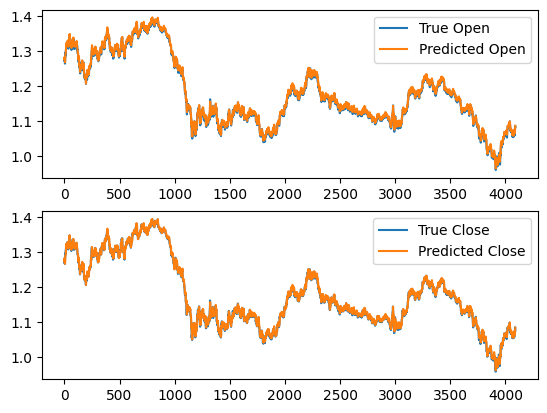

In [92]:
# Prédire les valeurs 'Open' et 'Close' pour un nouvel ensemble de données
predictions = model.predict(X_Test)

Open_rmse = np.sqrt(np.mean(predictions[:, 0] - y_Test[:, 0]) ** 2)
Close_rmse = np.sqrt(np.mean(predictions[:, 1] - y_Test[:, 1]) ** 2)

print("RMSE Open :", Open_rmse)
print("RMSE Close :", Close_rmse)

plt.subplot(2, 1, 1)
plt.plot(y_Test[:, 0], label='True Open')
plt.plot(predictions[:, 0], label='Predicted Open')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y_Test[:, 1], label='True Close')
plt.plot(predictions[:, 1], label='Predicted Close')
plt.legend()
plt.show()


In [93]:
model.save("trained_lstm_model.h5")